In [1]:
import os
import sys
import pandas as pd
#import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
# Build an absolute path from this notebook's parent directory
module_path = os.path.abspath(os.path.join('..', 'src'))
print(module_path)
# Add to sys.path if not already present
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)
# Now you can import the desired function or class
from graph_helpers import *
from helpers import *
from plots import *
from geopy.distance import geodesic
from find_net_stats import *
from graph_save_run import *
from spatial_helpers import *

/nfs/nfs9/home/nobackup/vakrao/nz_model/src
/nfs/nfs9/home/nobackup/vakrao/nz_model/src


In [2]:
year_fp_lin = "../src/Y_C/Y_C_lin_Y_D.csv"
month_fp_lin = "../src/M_C/M_C_lin_M_D.csv"
seas_fp_lin = "../src/S_C/S_C_lin_S_D.csv"
year_lin = pd.read_csv(year_fp_lin)
seas_lin = pd.read_csv(seas_fp_lin)
month_lin = pd.read_csv(month_fp_lin)
mlin = month_lin.drop_duplicates(subset=["b_w","b_b","seed","shift","alpha","months","D"]).reset_index()
slin = seas_lin.drop_duplicates(subset=["b_w","b_b","seed","alpha","shift","months","D"]).reset_index()
ylin = year_lin.drop_duplicates(subset=["b_w","b_b","seed","alpha","shift","months","D"]).reset_index()

In [3]:
line_x,line_y, = 20,40
tick_fs = 15
font = {'size': 10}
#months_all = ["02/11","03/11","04/11","05/11","06/11","07/11","08/11","09/11","10/11","11/11","12/11","1/12","2/12","3/12"]
months = ["","Mar/11","May/11","Jul/11","Sep/11","Nov/11","Jan/12","Mar/12"]
# using rc function
plt.rc('font', **font)
eps = 30
pct = 0.8
real_inc_fp = "../params/new_psa.csv"
ma_inc_fp = "../params/window_psa.csv"
#R = 0.01
v = True
## real values ##
month_real = find_best_config(mlin,real_inc_fp,"M",eps,pct,v,R)
season_real = find_best_config(slin,real_inc_fp,"S",eps,pct,v,R)
year_real = find_best_config(ylin,real_inc_fp,"Y",eps,pct,v,R)
## smoothened values ## 
month_smooth = find_best_config(mlin,ma_inc_fp,"M",eps,pct,v,R)
season_smooth = find_best_config(slin,ma_inc_fp,"S",eps,pct,v,R)
year_smooth = find_best_config(ylin,ma_inc_fp,"Y",eps,pct,v,R)

In [4]:
m_r = pd.DataFrame.from_dict(month_real)
s_r = pd.DataFrame.from_dict(season_real)
y_r = pd.DataFrame.from_dict(year_real)
m_s = pd.DataFrame.from_dict(month_smooth)
s_s = pd.DataFrame.from_dict(season_smooth)
y_s = pd.DataFrame.from_dict(year_smooth)

In [5]:
print(m_s.columns)

Index(['b_b', 'b_w', 'RMSE', 'seed', 'D'], dtype='object')


In [6]:
## now plot the posterior distributions for each configuraion 
width = .2
w_i = .025
multiplier = 0
tick_fs = 20
lab_fs = 25
fs = 1.7
post_x = 10
post_y = 15
lab_coords = (1,0.32)

0.2
0.2


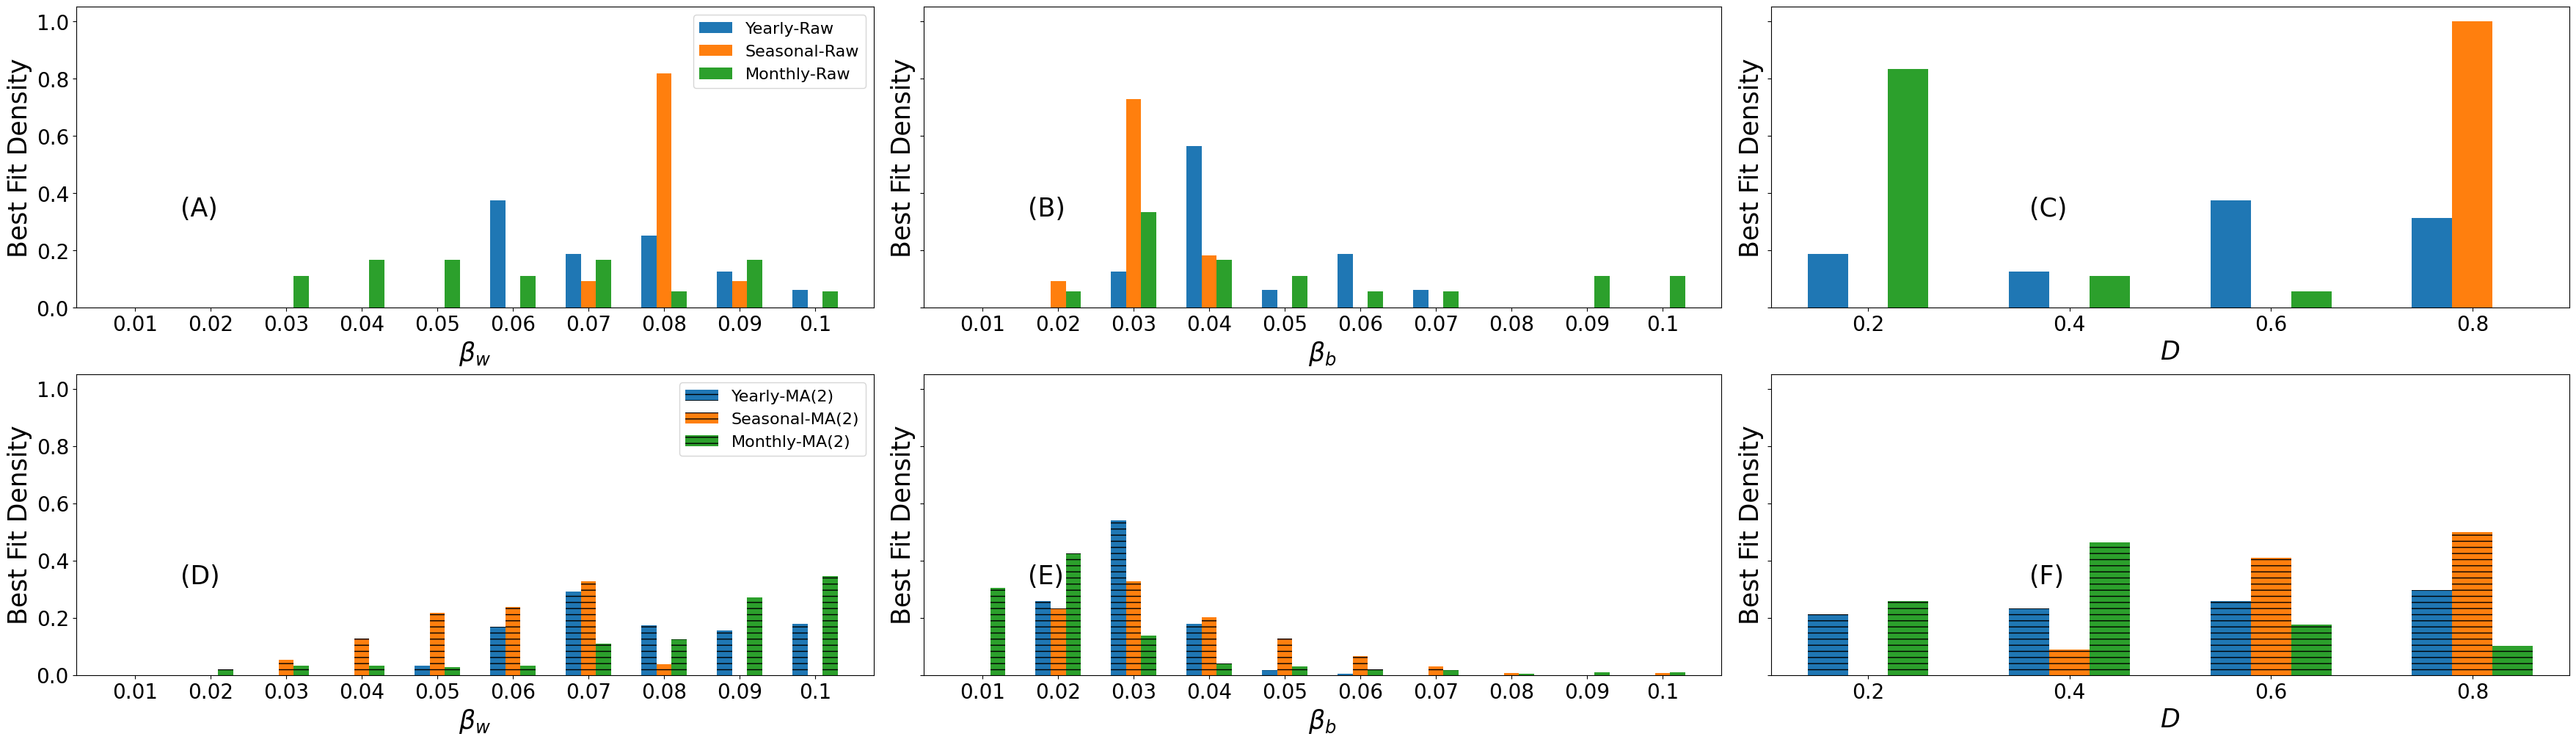

In [7]:
bar_x,bar_y = 35,10
fig,axes = plt.subplots(2,3,figsize=(bar_x,bar_y),layout='constrained',sharey=True)
fp_amount = 2
eps,pct = 30,.8
R = 0.01
all_data = {"Raw":[m_r,s_r,y_r],"MA(2)":[m_s,s_s,y_s]}
for w in range(0,fp_amount):
  #  print(w)
    if w == 0:
        inc_fp = real_inc_fp
        real_lab = "Raw"
    if w == 1:
        inc_fp = ma_inc_fp
        real_lab = "MA(2)"
    inc_data = all_data[real_lab]
    all_m,all_s,all_y = inc_data[0],inc_data[1],inc_data[2]
    year_lab = "Yearly-"+real_lab
    season_lab = "Seasonal-"+real_lab
    month_lab = "Monthly-"+real_lab
    bb_count_dict ={}
    bw_count_dict = {}
    D_count_dict = {}
    
    y_x_bw,y_y_bw,y_x_bb,y_y_bb,y_x_d,y_y_d = post_plots(ylin,all_y,inc_fp,eps,pct)
    s_x_bw,s_y_bw,s_x_bb,s_y_bb,s_x_d,s_y_d = post_plots(slin,all_s,inc_fp,eps,pct)
    m_x_bw,m_y_bw,m_x_bb,m_y_bb,m_x_d,m_y_d = post_plots(mlin,all_m,inc_fp,eps,pct)
    bw_count_dict[year_lab] = y_y_bw 
    bw_count_dict[season_lab] = s_y_bw
    bw_count_dict[month_lab] = m_y_bw
    bb_count_dict[year_lab] = y_y_bb
    bb_count_dict[season_lab] = s_y_bb
    bb_count_dict[month_lab] = m_y_bb
    D_count_dict[year_lab] = y_y_d
    D_count_dict[season_lab] = s_y_d
    D_count_dict[month_lab] = m_y_d
    x_bw = np.arange(len(bw_count_dict[year_lab]))  
    x_bb = np.arange(len(bb_count_dict[year_lab]))  
    x_D = np.arange(len(D_count_dict[month_lab]))
    
    width = .2
    mutliplier = 0
    
    multiplier = 1
    
    for attr,measurement in bw_count_dict.items():
        offset = width*multiplier
        if w == 0:
            rects = axes[w,0].bar(x_bw+offset,measurement,width,label=attr)
        if w == 1:
            rects = axes[w,0].bar(x_bw+offset,measurement,width,hatch="--",label=attr)
       # axes[0].bar_label(rects, padding=3)
        multiplier += 1
    legend_fs = 16
    tick_off = 0.2

    if w == 0:
        axes[w,0].annotate("(A)",lab_coords,lab_coords,fontsize=lab_fs)
        axes[w,0].legend(loc='upper right',fontsize=legend_fs)

    if w == 1:
        axes[w,0].annotate("(D)",lab_coords,fontsize=lab_fs)
        axes[w,0].legend(loc='upper right',fontsize=legend_fs)
    print(width)
    axes[w,0].set_ylabel("Best Fit Density",fontsize=lab_fs)
    axes[w,0].set_xticks(x_bw+width+tick_off,y_x_bw)
    axes[w,0].set_xlabel(r"$\beta_w$",fontsize=lab_fs)
    axes[w,0].tick_params(axis='both', which='major', labelsize=tick_fs)
    
    multiplier = 1
    for attr,measurement in bb_count_dict.items():
        offset = width*multiplier
        if w == 0:
            rects = axes[w,1].bar(x_bb+offset,measurement,width,label=attr)
        if w == 1:
            rects = axes[w,1].bar(x_bb+offset,measurement,width,hatch="--",label=attr)

       # axes[0].bar_label(rects, padding=3)
        multiplier += 1
    axes[w,1].set_xticks(x_bb+width+tick_off,y_x_bb)
    axes[w,1].set_xlabel(r"$\beta_b$",fontsize=lab_fs)
    axes[w,1].tick_params(axis='both', which='major', labelsize=tick_fs)
    axes[w,1].set_ylabel("Best Fit Density",fontsize=lab_fs)
    if w == 0:
        axes[w,1].annotate("(B)",lab_coords,fontsize=lab_fs)
    if w == 1:
        axes[w,1].annotate("(E)",lab_coords,fontsize=lab_fs)
    width = 0.2
    multiplier = 0
    for attr,measurement in D_count_dict.items():
        offset = width*multiplier
        if w == 0:
            rects = axes[w,2].bar(x_D+offset,measurement,width,label=attr)
        if w == 1:
            rects = axes[w,2].bar(x_D+offset,measurement,width,hatch="--",label=attr)
       # axes[0].bar_label(rects, padding=3)
        multiplier += 1
    axes[w,2].set_xticks(x_D+width,y_x_d)
    axes[w,2].set_xlabel(r"$D$",fontsize=lab_fs)
    axes[w,2].tick_params(axis='both', which='major', labelsize=tick_fs)
    axes[w,2].set_ylabel("Best Fit Density",fontsize=lab_fs)
    if w == 0:
        axes[w,2].annotate("(C)",lab_coords,fontsize=lab_fs)
    if w == 1:
        axes[w,2].annotate("(F)",lab_coords,fontsize=lab_fs)

fig.savefig("figs/post_dist_params.png")

In [8]:
def add_panel_label(ax, label):
    ax.text(
        0.02, 0.95, label,
        transform=ax.transAxes,
        fontsize=lab_fs,
        fontweight="normal",
        va="top",
        ha="left"
    )
leg_fs = 16

In [9]:
agg_colors = {
    "Yearly":   "tab:blue",
    "Seasonal": "tab:orange",
    "Monthly":  "tab:green",
}

/tmp/ipykernel_1492687/2165836029.py:10: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(right=0.82)


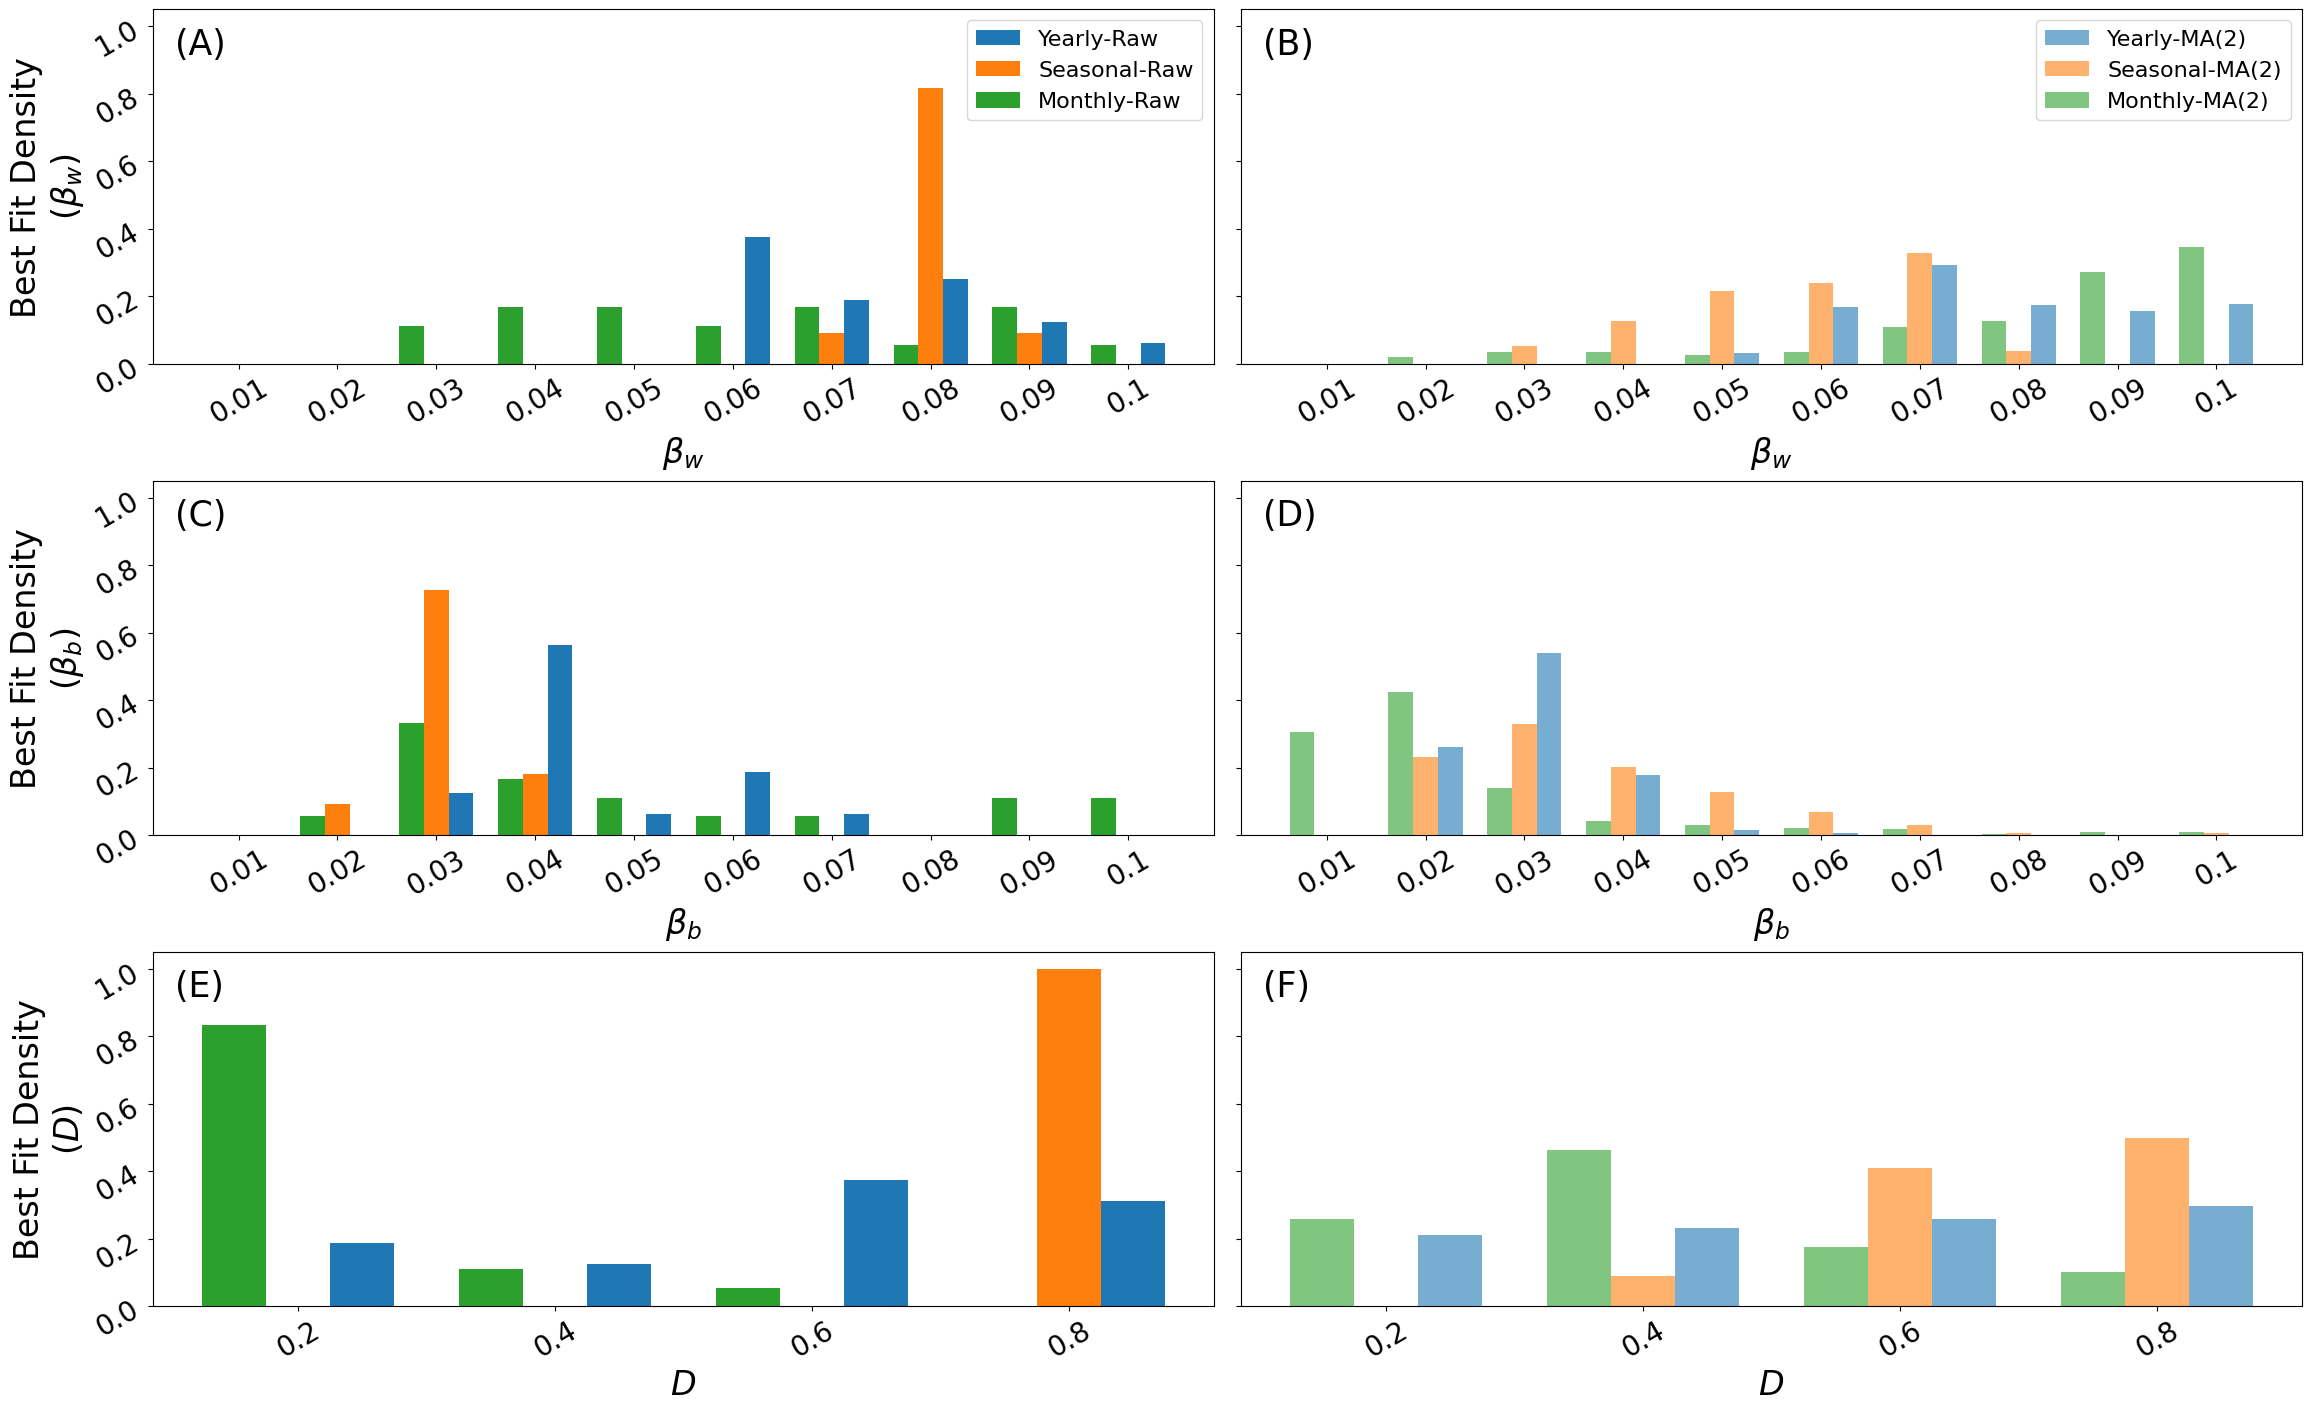

In [13]:
import matplotlib.patches as mpatches

bar_x, bar_y = 23, 14
fig, axes = plt.subplots(
    3, 2,
    figsize=(bar_x, bar_y),
    layout="constrained",
    sharey="row"
)
fig.subplots_adjust(right=0.82)


eps, pct = 30, 0.8
R = 0.01
width = 0.25
tick_angle = 30


aggs = [
    ("Monthly",  mlin, m_r, m_s),
    ("Seasonal", slin, s_r, s_s),
    ("Yearly",   ylin, y_r, y_s),
]

panel_labels = {
    (0, 0): "(A)", (0, 1): "(B)",
    (1, 0): "(C)", (1, 1): "(D)",
    (2, 0): "(E)", (2, 1): "(F)",
}

# store bar colors for legend construction
#agg_colors = {}

for col, (smooth_label, inc_fp) in enumerate([
    ("Raw", real_inc_fp),
    ("MA(2)", ma_inc_fp),
]):

    for agg_idx, (agg_name, lin, raw_dat, ma_dat) in enumerate(aggs):

        data = raw_dat if smooth_label == "Raw" else ma_dat

        x_bw, y_bw, x_bb, y_bb, x_d, y_d = post_plots(
            lin, data, inc_fp, R, eps, pct
        )

        for row, (xvals, yvals, xlabel) in enumerate([
            (x_bw, y_bw, r"$\beta_w$"),
            (x_bb, y_bb, r"$\beta_b$"),
            (x_d,  y_d,  r"$D$"),
        ]):

            offset = agg_idx * width
            
            bars = axes[row, col].bar(
                np.arange(len(yvals)) + offset,
                yvals,
                width,
                color=agg_colors[agg_name],
                alpha=0.6 if smooth_label == "MA(2)" else None
                )


            # store color ONCE per aggregation
           # if agg_name not in agg_colors:
            #    agg_colors[agg_name] = bars[0].get_facecolor()

            axes[row, col].set_xticks(
                np.arange(len(xvals)) + width,
                xvals
            )
            # inside plotting loop (already present, just update fontsize)
            axes[row, col].set_xlabel(xlabel, fontsize=24)

            #axes[row, col].set_xlabel(xlabel, fontsize=lab_fs)
            axes[row, col].tick_params(axis="both", labelsize=tick_fs,rotation=tick_angle)

# ---- Compute global ymax for standardization ----
all_y_vals = []

for smooth_label, inc_fp in [("Raw", real_inc_fp), ("MA(2)", ma_inc_fp)]:
    for agg_name, lin, raw_dat, ma_dat in aggs:
        data = raw_dat if smooth_label == "Raw" else ma_dat
        _, y_bw, _, y_bb, _, y_d = post_plots(
            lin, data, inc_fp, R, eps, pct
        )
        all_y_vals.extend(y_bw)
        all_y_vals.extend(y_bb)
        all_y_vals.extend(y_d)

global_ymax = max(all_y_vals) * 1.05

for r in range(3):
    for c in range(2):
        axes[r, c].set_ylim(0, global_ymax)
        axes[r, c].tick_params(
            axis="both",
            which="major",
            labelsize=20
        )


axes[0, 0].set_ylabel("Best Fit Density\n($\\beta_w$)", fontsize=24)
axes[1, 0].set_ylabel("Best Fit Density\n($\\beta_b$)", fontsize=24)
axes[2, 0].set_ylabel("Best Fit Density\n($D$)", fontsize=24)


# ---- Panel labels (safe placement) ----
for (r, c), lab in panel_labels.items():
    add_panel_label(axes[r, c], lab)

# ---- Legends (column-specific, correct colors & labels) ----
for col, smooth_label in enumerate(["Raw", "MA(2)"]):
    # ---- Figure-level legends on the right ----
    # ---- Legends placed inside right column ----
    raw_handles = [
        mpatches.Patch(
            facecolor=agg_colors[name],
            label=f"{name}-Raw"
        )
        for name in ["Yearly", "Seasonal", "Monthly"]
    ]
    ma_handles = [
            mpatches.Patch(
                facecolor=agg_colors[name],
                alpha=0.6,
                label=f"{name}-MA(2)"
            )
            for name in ["Yearly", "Seasonal", "Monthly"]
        ]
        
    axes[0, 0].legend(
        handles=raw_handles,
        fontsize=16,
        loc="upper right",
        frameon=True
    )
    
    axes[0, 1].legend(
        handles=ma_handles,
        fontsize=16,
        loc="upper right",
        frameon=True
    )

fig.savefig("figs/post_dist_params.png", dpi=300)
